### Correlate P time series for each pair of gauges:
### Fisera Ridge, Upper Clearing, Hay Meadow, Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills

In [1]:
import numpy as np
import pandas as pd
import math
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from numpy import genfromtxt

### Read in P data for all 8 stations from csv file created in P_inputs_2005-2016.ipynb

In [2]:
# Use pd.read_csv to read csv file
allstnsP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\Pinputs_2005-2016.csv",
                         index_col=0)
allstnsP_df.head()

,FR_p_mm,UC_p_mm,KP_p_mm,HM_p_mm,BCS_p_mm,K_p_mm,BV_p_mm,WH_p_mm
date,,,,,,,,
2005-10-01,16.0160,11.3028,16.0,7.3722,11.0,0.0,10.4,0.8
2005-10-02,0.0000,0.0000,0.0,0.0000,0.2,0.4,0.0,0.0
2005-10-03,0.7649,0.5399,0.0,0.0000,0.2,1.2,0.2,4.0
2005-10-04,0.5463,0.3855,0.0,0.0000,0.0,0.0,0.4,0.0
2005-10-05,0.0896,0.0633,1.4,0.0000,0.0,0.0,0.0,0.0


### Pair 1: Fisera Ridge (2325 m) & Upper Clearing (1845 m)

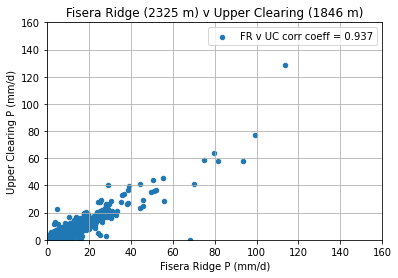

In [3]:
FRUCcorr = allstnsP_df["FR_p_mm"].corr(allstnsP_df["UC_p_mm"])
allstnsP_df.plot.scatter(x='FR_p_mm', y='UC_p_mm', c='tab:blue',
                               title="Fisera Ridge (2325 m) v Upper Clearing (1846 m)",
                               label="FR v UC corr coeff = 0.937")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/d)")
plt.ylabel("Upper Clearing P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRUCcorr2005-16.png')

### Pair 2: Fisera Ridge (2325 m) & Hay Meadow (1436 m)

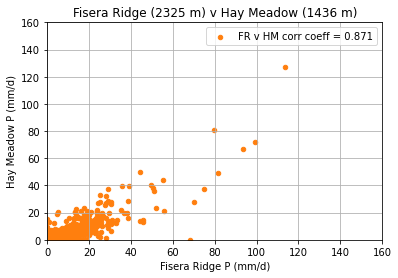

In [4]:
FRHMcorr = allstnsP_df["FR_p_mm"].corr(allstnsP_df["HM_p_mm"])
allstnsP_df.plot.scatter(x='FR_p_mm', y='HM_p_mm', c='tab:orange',
                               title="Fisera Ridge (2325 m) v Hay Meadow (1436 m)",
                               label="FR v HM corr coeff = 0.871")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/d)")
plt.ylabel("Hay Meadow P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRHMcorr2005-16.png')

### Pair 3: Fisera Ridge (2325 m) & Kananaskis (1391 m)

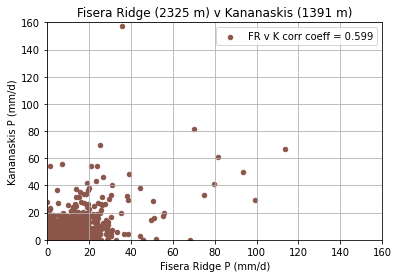

In [5]:
FRKcorr = allstnsP_df["FR_p_mm"].corr(allstnsP_df["K_p_mm"])
allstnsP_df.plot.scatter(x='FR_p_mm', y='K_p_mm', c='tab:brown',
                               title="Fisera Ridge (2325 m) v Kananaskis (1391 m)",
                               label="FR v K corr coeff = 0.599")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/d)")
plt.ylabel("Kananaskis P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRKcorr2005-16.png')

### Pair 4: Fisera Ridge (2325 m) & Bow Valley (1298 m)

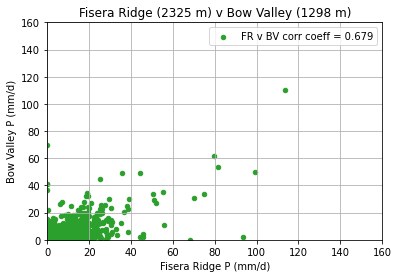

In [6]:
FRBVcorr = allstnsP_df["FR_p_mm"].corr(allstnsP_df["BV_p_mm"])
allstnsP_df.plot.scatter(x='FR_p_mm', y='BV_p_mm', c='tab:green',
                               title="Fisera Ridge (2325 m) v Bow Valley (1298 m)",
                               label="FR v BV corr coeff = 0.679")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/d)")
plt.ylabel("Bow Valley P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRBVcorr2005-16.png')

### Pair 5: Fisera Ridge (2325 m) & Kananaskis Pocaterra (1610 m)

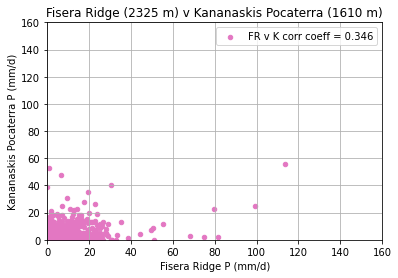

In [7]:
FRKPcorr = allstnsP_df["FR_p_mm"].corr(allstnsP_df["KP_p_mm"])
allstnsP_df.plot.scatter(x='FR_p_mm', y='KP_p_mm', c='tab:pink',
                               title="Fisera Ridge (2325 m) v Kananaskis Pocaterra (1610 m)",
                               label="FR v K corr coeff = 0.346")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/d)")
plt.ylabel("Kananaskis Pocaterra P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRKPcorr2005-16.png')

### Pair 6: Fisera Ridge (2325 m) & Banff CS (1397 m)

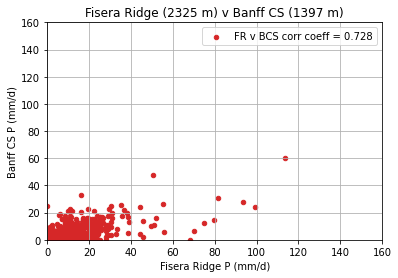

In [8]:
FRBCScorr = allstnsP_df["FR_p_mm"].corr(allstnsP_df["BCS_p_mm"])
allstnsP_df.plot.scatter(x='FR_p_mm', y='BCS_p_mm', c='tab:red',
                               title="Fisera Ridge (2325 m) v Banff CS (1397 m)",
                               label="FR v BCS corr coeff = 0.728")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/d)")
plt.ylabel("Banff CS P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRBCScorr2005-16.png')

### Pair 7: Fisera Ridge (2325 m) & Wildcat Hills (1268 m)

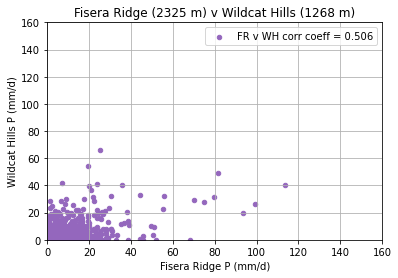

In [9]:
FRWHcorr = allstnsP_df["FR_p_mm"].corr(allstnsP_df["WH_p_mm"])
allstnsP_df.plot.scatter(x='FR_p_mm', y='WH_p_mm', c='tab:purple',
                               title="Fisera Ridge (2325 m) v Wildcat Hills (1268 m)",
                               label="FR v WH corr coeff = 0.506")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/d)")
plt.ylabel("Wildcat Hills P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRWHcorr2005-16.png')

### Pair 8: Upper Clearing (1845 m) & Hay Meadow (1436 m)

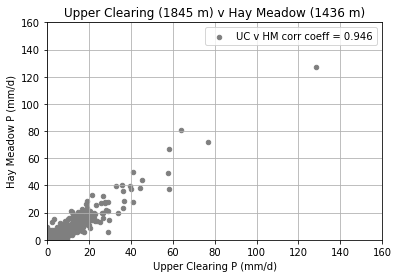

In [10]:
UCHMcorr = allstnsP_df["UC_p_mm"].corr(allstnsP_df["HM_p_mm"])
allstnsP_df.plot.scatter(x='UC_p_mm', y='HM_p_mm', c='tab:gray',
                               title="Upper Clearing (1845 m) v Hay Meadow (1436 m)",
                               label="UC v HM corr coeff = 0.946")
plt.grid()
plt.xlabel("Upper Clearing P (mm/d)")
plt.ylabel("Hay Meadow P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCHMcorr2005-16.png')

### Pair 9: Upper Clearing (1845 m) & Kananaskis (1391 m)

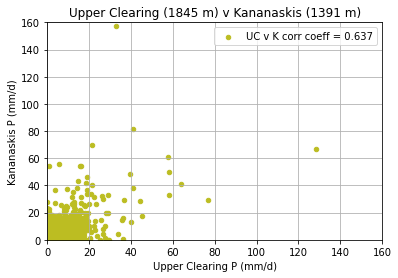

In [11]:
UCKcorr = allstnsP_df["UC_p_mm"].corr(allstnsP_df["K_p_mm"])
allstnsP_df.plot.scatter(x='UC_p_mm', y='K_p_mm', c='tab:olive',
                               title="Upper Clearing (1845 m) v Kananaskis (1391 m)",
                               label="UC v K corr coeff = 0.637")
plt.grid()
plt.xlabel("Upper Clearing P (mm/d)")
plt.ylabel("Kananaskis P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCKcorr2005-16.png')

### Pair 10: Upper Clearing (1845 m) & Bow Valley (1298 m)

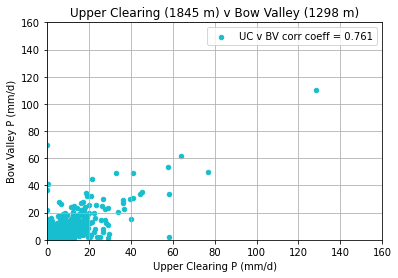

In [12]:
UCBVcorr = allstnsP_df["UC_p_mm"].corr(allstnsP_df["BV_p_mm"])
allstnsP_df.plot.scatter(x='UC_p_mm', y='BV_p_mm', c='tab:cyan',
                               title="Upper Clearing (1845 m) v Bow Valley (1298 m)",
                               label="UC v BV corr coeff = 0.761")
plt.grid()
plt.xlabel("Upper Clearing P (mm/d)")
plt.ylabel("Bow Valley P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCBVcorr2005-16.png')

### Pair 11: Upper Clearing (1845 m) & Kananaskis Pocaterra (1610 m)

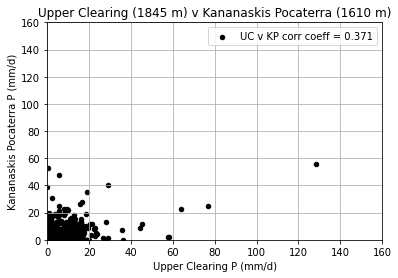

In [13]:
UCKPcorr = allstnsP_df["UC_p_mm"].corr(allstnsP_df["KP_p_mm"])
allstnsP_df.plot.scatter(x='UC_p_mm', y='KP_p_mm', c='black',
                               title="Upper Clearing (1845 m) v Kananaskis Pocaterra (1610 m)",
                               label="UC v KP corr coeff = 0.371")
plt.grid()
plt.xlabel("Upper Clearing P (mm/d)")
plt.ylabel("Kananaskis Pocaterra P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCKPcorr2005-16.png')

### Pair 12: Upper Clearing (1845 m) & Banff CS (1397 m)

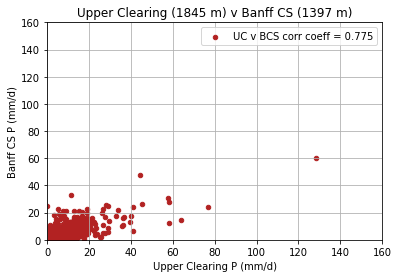

In [14]:
UCBCScorr = allstnsP_df["UC_p_mm"].corr(allstnsP_df["BCS_p_mm"])
allstnsP_df.plot.scatter(x='UC_p_mm', y='BCS_p_mm', c='firebrick',
                               title="Upper Clearing (1845 m) v Banff CS (1397 m)",
                               label="UC v BCS corr coeff = 0.775")
plt.grid()
plt.xlabel("Upper Clearing P (mm/d)")
plt.ylabel("Banff CS P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCBCScorr2005-16.png')

### Pair 13: Upper Clearing (1845 m) & Wildcat Hills (1268 m)

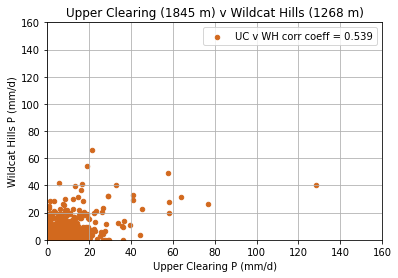

In [15]:
UCWHcorr = allstnsP_df["UC_p_mm"].corr(allstnsP_df["WH_p_mm"])
allstnsP_df.plot.scatter(x='UC_p_mm', y='WH_p_mm', c='chocolate',
                               title="Upper Clearing (1845 m) v Wildcat Hills (1268 m)",
                               label="UC v WH corr coeff = 0.539")
plt.grid()
plt.xlabel("Upper Clearing P (mm/d)")
plt.ylabel("Wildcat Hills P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCWHcorr2005-16.png')

### Pair 14: Hay Meadow (1436 m) & Kananaskis (1391 m)

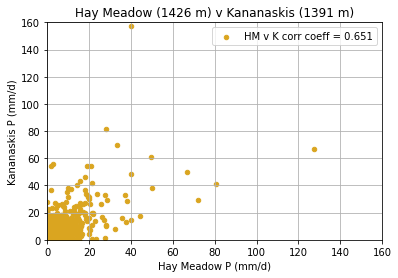

In [16]:
HMKcorr = allstnsP_df["HM_p_mm"].corr(allstnsP_df["K_p_mm"])
allstnsP_df.plot.scatter(x='HM_p_mm', y='K_p_mm', c='goldenrod',
                               title="Hay Meadow (1426 m) v Kananaskis (1391 m)",
                               label="HM v K corr coeff = 0.651")
plt.grid()
plt.xlabel("Hay Meadow P (mm/d)")
plt.ylabel("Kananaskis P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMKcorr2005-16.png')

### Pair 15: Hay Meadow (1436 m) & Bow Valley (1298 m)

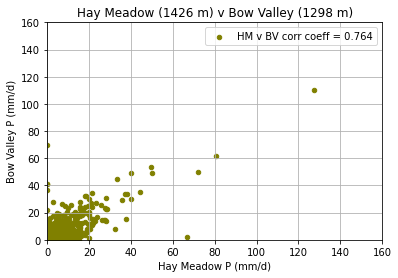

In [17]:
HMBVcorr = allstnsP_df["HM_p_mm"].corr(allstnsP_df["BV_p_mm"])
allstnsP_df.plot.scatter(x='HM_p_mm', y='BV_p_mm', c='olive',
                               title="Hay Meadow (1426 m) v Bow Valley (1298 m)",
                               label="HM v BV corr coeff = 0.764")
plt.grid()
plt.xlabel("Hay Meadow P (mm/d)")
plt.ylabel("Bow Valley P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMBVcorr2005-16.png')

### Pair 16: Hay Meadow (1436 m) & Kananaskis Pocaterra (1610 m)

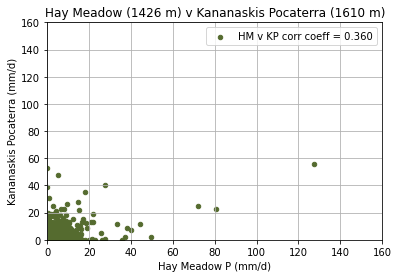

In [18]:
HMKPcorr = allstnsP_df["HM_p_mm"].corr(allstnsP_df["KP_p_mm"])
allstnsP_df.plot.scatter(x='HM_p_mm', y='KP_p_mm', c='darkolivegreen',
                               title="Hay Meadow (1426 m) v Kananaskis Pocaterra (1610 m)",
                               label="HM v KP corr coeff = 0.360")
plt.grid()
plt.xlabel("Hay Meadow P (mm/d)")
plt.ylabel("Kananaskis Pocaterra (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMKPcorr2005-16.png')

### Pair 17: Hay Meadow (1436 m) & Banff CS (1397 m)

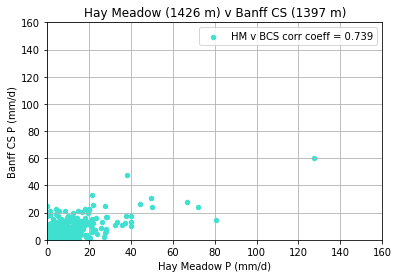

In [19]:
HMBCScorr = allstnsP_df["HM_p_mm"].corr(allstnsP_df["BCS_p_mm"])
allstnsP_df.plot.scatter(x='HM_p_mm', y='BCS_p_mm', c='turquoise',
                               title="Hay Meadow (1426 m) v Banff CS (1397 m)",
                               label="HM v BCS corr coeff = 0.739")
plt.grid()
plt.xlabel("Hay Meadow P (mm/d)")
plt.ylabel("Banff CS P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMBCScorr2005-16.png')

### Pair 18: Hay Meadow (1436 m) & Wildcat Hills (1268 m)

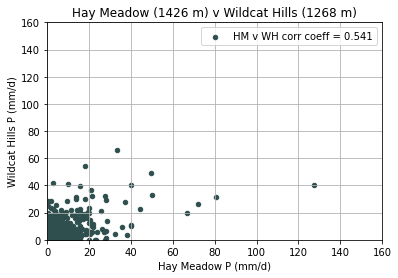

In [20]:
HMWHcorr = allstnsP_df["HM_p_mm"].corr(allstnsP_df["WH_p_mm"])
allstnsP_df.plot.scatter(x='HM_p_mm', y='WH_p_mm', c='darkslategray',
                               title="Hay Meadow (1426 m) v Wildcat Hills (1268 m)",
                               label="HM v WH corr coeff = 0.541")
plt.grid()
plt.xlabel("Hay Meadow P (mm/d)")
plt.ylabel("Wildcat Hills P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMWHcorr2005-16.png')

### Pair 19: Kananaskis (1391 m) & Bow Valley (1298 m)

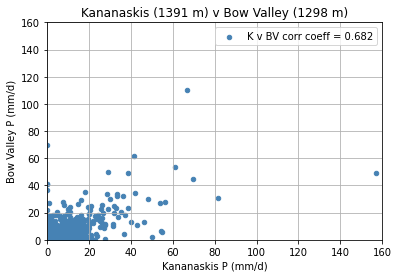

In [21]:
KBVcorr = allstnsP_df["K_p_mm"].corr(allstnsP_df["BV_p_mm"])
allstnsP_df.plot.scatter(x='K_p_mm', y='BV_p_mm', c='steelblue',
                               title="Kananaskis (1391 m) v Bow Valley (1298 m)",
                               label="K v BV corr coeff = 0.682")
plt.grid()
plt.xlabel("Kananaskis P (mm/d)")
plt.ylabel("Bow Valley P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\KBVcorr2005-16.png')

### Pair 20: Kananaskis (1391 m) & Kananaskis Pocaterra (1610 m)

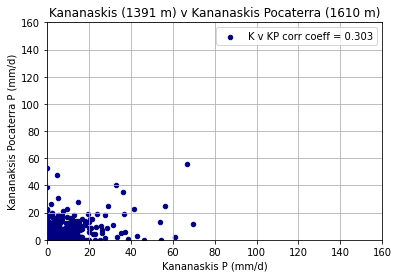

In [22]:
KKPcorr = allstnsP_df["K_p_mm"].corr(allstnsP_df["KP_p_mm"])
allstnsP_df.plot.scatter(x='K_p_mm', y='KP_p_mm', c='navy',
                               title="Kananaskis (1391 m) v Kananaskis Pocaterra (1610 m)",
                               label="K v KP corr coeff = 0.303")
plt.grid()
plt.xlabel("Kananaskis P (mm/d)")
plt.ylabel("Kananaksis Pocaterra P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\KKPcorr2005-16.png')

### Pair 21: Kananaskis (1391 m) & Banff CS (1397 m)

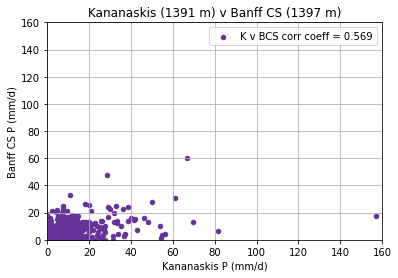

In [23]:
KBCScorr = allstnsP_df["K_p_mm"].corr(allstnsP_df["BCS_p_mm"])
allstnsP_df.plot.scatter(x='K_p_mm', y='BCS_p_mm', c='rebeccapurple',
                               title="Kananaskis (1391 m) v Banff CS (1397 m)",
                               label="K v BCS corr coeff = 0.569")
plt.grid()
plt.xlabel("Kananaskis P (mm/d)")
plt.ylabel("Banff CS P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\KBCScorr2005-16.png')

### Pair 22: Kananaskis (1391 m) & Wildcat Hills (1268 m)

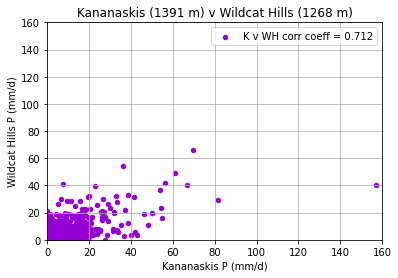

In [24]:
KWHcorr = allstnsP_df["K_p_mm"].corr(allstnsP_df["WH_p_mm"])
allstnsP_df.plot.scatter(x='K_p_mm', y='WH_p_mm', c='darkviolet',
                               title="Kananaskis (1391 m) v Wildcat Hills (1268 m)",
                               label="K v WH corr coeff = 0.712")
plt.grid()
plt.xlabel("Kananaskis P (mm/d)")
plt.ylabel("Wildcat Hills P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\KWHcorr2005-16.png')

### Pair 23: Bow Valley (1298 m) & Kananaskis Pocaterra (1610 m)

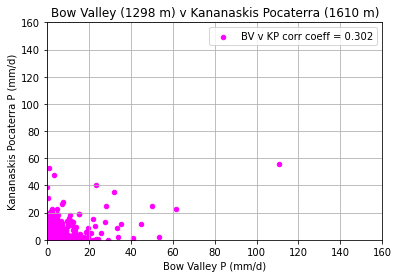

In [25]:
BVKPcorr = allstnsP_df["BV_p_mm"].corr(allstnsP_df["KP_p_mm"])
allstnsP_df.plot.scatter(x='BV_p_mm', y='KP_p_mm', c='fuchsia',
                               title="Bow Valley (1298 m) v Kananaskis Pocaterra (1610 m)",
                               label="BV v KP corr coeff = 0.302")
plt.grid()
plt.xlabel("Bow Valley P (mm/d)")
plt.ylabel("Kananaskis Pocaterra P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\BVKPcorr2005-16.png')

### Pair 24: Bow Valley (1298 m) & Banff CS (1397 m)

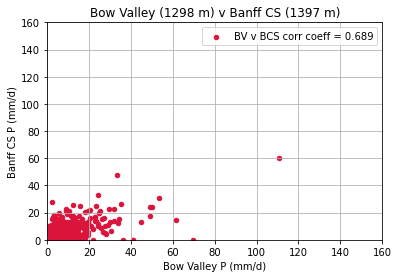

In [26]:
BVBCScorr = allstnsP_df["BV_p_mm"].corr(allstnsP_df["BCS_p_mm"])
allstnsP_df.plot.scatter(x='BV_p_mm', y='BCS_p_mm', c='crimson',
                               title="Bow Valley (1298 m) v Banff CS (1397 m)",
                               label="BV v BCS corr coeff = 0.689")
plt.grid()
plt.xlabel("Bow Valley P (mm/d)")
plt.ylabel("Banff CS P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\BVBCScorr2005-16.png')

### Pair 25: Bow Valley (1298 m) & Wildcat Hills (1268 m)

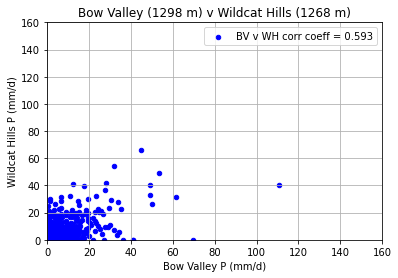

In [27]:
BVWHcorr = allstnsP_df["BV_p_mm"].corr(allstnsP_df["WH_p_mm"])
allstnsP_df.plot.scatter(x='BV_p_mm', y='WH_p_mm', c='b',
                               title="Bow Valley (1298 m) v Wildcat Hills (1268 m)",
                               label="BV v WH corr coeff = 0.593")
plt.grid()
plt.xlabel("Bow Valley P (mm/d)")
plt.ylabel("Wildcat Hills P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\BVWHcorr2005-16.png')

### Pair 26: Kananaskis Pocaterra (1610 m) & Banff CS (1397 m)

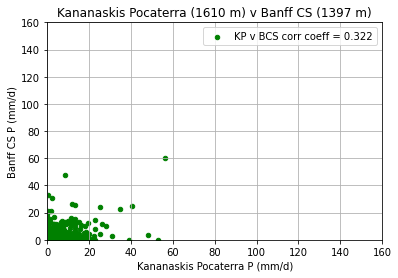

In [28]:
KPBCScorr = allstnsP_df["KP_p_mm"].corr(allstnsP_df["BCS_p_mm"])
allstnsP_df.plot.scatter(x='KP_p_mm', y='BCS_p_mm', c='g',
                               title="Kananaskis Pocaterra (1610 m) v Banff CS (1397 m)",
                               label="KP v BCS corr coeff = 0.322")
plt.grid()
plt.xlabel("Kananaskis Pocaterra P (mm/d)")
plt.ylabel("Banff CS P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\KPBCScorr2005-16.png')

### Pair 27: Kananskis Pocaterra (1610 m) & Wildcat Hills (1268 m)

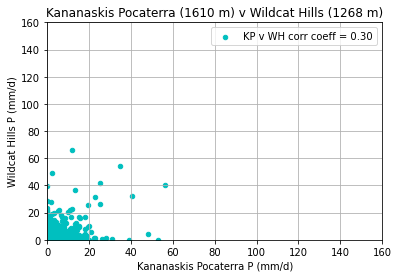

In [29]:
KPWHcorr = allstnsP_df["KP_p_mm"].corr(allstnsP_df["WH_p_mm"])
allstnsP_df.plot.scatter(x='KP_p_mm', y='WH_p_mm', c='c',
                               title="Kananaskis Pocaterra (1610 m) v Wildcat Hills (1268 m)",
                               label="KP v WH corr coeff = 0.30")
plt.grid()
plt.xlabel("Kananaskis Pocaterra P (mm/d)")
plt.ylabel("Wildcat Hills P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\KPWHcorr2005-16.png')

### Pair 28: Banff CS (1397 m) & Wildcat Hills (1268 m)

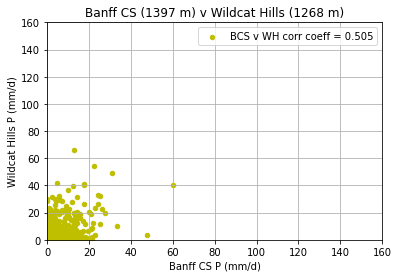

In [30]:
BCSWHcorr = allstnsP_df["BCS_p_mm"].corr(allstnsP_df["WH_p_mm"])
allstnsP_df.plot.scatter(x='BCS_p_mm', y='WH_p_mm', c='y',
                               title="Banff CS (1397 m) v Wildcat Hills (1268 m)",
                               label="BCS v WH corr coeff = 0.505")
plt.grid()
plt.xlabel("Banff CS P (mm/d)")
plt.ylabel("Wildcat Hills P (mm/d)")
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\BCSWHcorr2005-16.png')

### Print all 28 correlation values

In [31]:
print("Fisera Ridge Upper Clearing correlation =", FRUCcorr.round(3))
print("Fisera Ridge Hay Meadow correlation =", FRHMcorr.round(3))
print("Fisera Ridge Kananaskis correlation =", FRKcorr.round(3))
print("Fisera Ridge Bow Valley correlation =", FRBVcorr.round(3))
print("Fisera Ridge Kananaskis Pocaterra correlation =", FRKPcorr.round(3))
print("Fisera Ridge Banff CS correlation =", FRBCScorr.round(3))
print("Fisera Ridge Wildcat Hills correlation =", FRWHcorr.round(3))
print("Upper Clearing Hay Meadow correlation =", UCHMcorr.round(3))
print("Upper Clearing Kananaskis correlation =", UCKcorr.round(3))
print("Upper Clearing Bow Valley correlation =", UCBVcorr.round(3))
print("Upper Clearing Kananaskis Pocaterra correlation =", UCKPcorr.round(3))
print("Upper Clearing Banff CS correlation =", UCBCScorr.round(3))
print("Upper Clearing Wildcat Hills correlation =", UCWHcorr.round(3))
print("Hay Meadow Kananaskis correlation =", HMKcorr.round(3))
print("Hay Meadow Bow Valley correlation =", HMBVcorr.round(3))
print("Hay Meadow Kananaskis Pocaterra correlation =", HMKPcorr.round(3))
print("Hay Meadow Banff CS correlation =", HMBCScorr.round(3))
print("Hay Meadow Wildcat Hills correlation =", HMWHcorr.round(3))
print("Kananaskis Bow Valley correlation =", KBVcorr.round(3))
print("Kananaskis Kananaskis Pocaterra correlation =", KKPcorr.round(3))
print("Kananaskis Banff CS correlation =", KBCScorr.round(3))
print("Kananaskis Wildcat Hills correlation =", KWHcorr.round(3))
print("Bow Valley Kananaskis Pocaterra correlation =", BVKPcorr.round(3))
print("Bow Valley Banff CS correlation =", BVBCScorr.round(3))
print("Bow Valley Wildcat Hills correlation =", BVWHcorr.round(3))
print("Kananaskis Pocaterra Banff CS correlation =", KPBCScorr.round(3))
print("Kananaskis Pocaterra Wildcat Hills correlation =", KPWHcorr.round(3))
print("Banff CS Wildcat Hills correlation =", BCSWHcorr.round(3))

Fisera Ridge Upper Clearing correlation = 0.937
Fisera Ridge Hay Meadow correlation = 0.871
Fisera Ridge Kananaskis correlation = 0.599
Fisera Ridge Bow Valley correlation = 0.688
Fisera Ridge Kananaskis Pocaterra correlation = 0.441
Fisera Ridge Banff CS correlation = 0.728
Fisera Ridge Wildcat Hills correlation = 0.516
Upper Clearing Hay Meadow correlation = 0.946
Upper Clearing Kananaskis correlation = 0.637
Upper Clearing Bow Valley correlation = 0.77
Upper Clearing Kananaskis Pocaterra correlation = 0.468
Upper Clearing Banff CS correlation = 0.775
Upper Clearing Wildcat Hills correlation = 0.553
Hay Meadow Kananaskis correlation = 0.652
Hay Meadow Bow Valley correlation = 0.774
Hay Meadow Kananaskis Pocaterra correlation = 0.455
Hay Meadow Banff CS correlation = 0.739
Hay Meadow Wildcat Hills correlation = 0.553
Kananaskis Bow Valley correlation = 0.686
Kananaskis Kananaskis Pocaterra correlation = 0.461
Kananaskis Banff CS correlation = 0.571
Kananaskis Wildcat Hills correlation

### Sort station pairs by descending order of correlation coefficient
### Also add in distance (m) between each gauge pair

In [32]:
# step 1: initialise my lists
corr = [["FRUC", 2020, FRUCcorr.round(3)], ["FRHM", 4770, FRHMcorr.round(3)], ["FRK", 14310, FRKcorr.round(3)], 
        ["FRBV", 17140, FRBVcorr.round(3)], ["FRKP", 27730, FRKPcorr.round(3)], ["FRBCS", 44750, FRBCScorr.round(3)],
        ["FRWH", 48580, FRWHcorr.round(3)],
        ["UCHM", 2910, UCHMcorr.round(3)], ["UCK", 12650, UCKcorr.round(3)], ["UCBV", 16040, UCBVcorr.round(3)],
        ["UCKP", 27420, UCKPcorr.round(3)], ["UCBCS", 45830, UCBCScorr.round(3)], ["UCWH", 47160, UCWHcorr.round(3)],
        ["HMK", 36890, HMKcorr.round(3)], ["HMBV", 16300, HMBVcorr.round(3)], ["HMKP", 25800, HMKPcorr.round(3)],
        ["HMBCS", 48450, HMBCScorr.round(3)], ["HMWH", 46540, HMWHcorr.round(3)],
        ["KBV", 6600, KBVcorr.round(3)], ["KKP", 35550, KKPcorr.round(3)],
        ["KBCS", 46750, KBCScorr.round(3)], ["KWH", 34730, KWHcorr.round(3)],
        ["BVKP", 41420, BVKPcorr.round(3)], ["BVBCS", 41210, BVBCScorr.round(3)], ["BVWH", 31830, BVWHcorr.round(3)],
        ["KPBCS", 71390, KPBCScorr.round(3)], ["KPWH", 67980, KPWHcorr.round(3)],
        ["BCSWH", 58090, BCSWHcorr.round(3)]]
# corr

In [33]:
# step 2: create df from lists
corr_df = pd.DataFrame(corr, columns = ["station_pair", "separation_distance_m", "corr_coeff"])
# corr_df.set_index("station_pair", inplace=True)
# corr_df

In [34]:
# sort by descending order of corr coeff
corr_df.sort_values(by=['corr_coeff'], inplace=True, ascending=False)
# sort by separation distance
corr_df.sort_values(by=['separation_distance_m'], inplace=True, ascending=True)
# corr_df
# write to csv
corr_df.to_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\corr_table_2005-16.csv", index=False)

### Correlation by separation distance: plot correlations above against distance between gauge pairs to give us an upside-down spatial variogram

In [35]:
# sort by separation distance
corr_df.sort_values(by=['separation_distance_m'], inplace=True, ascending=True)
corr_df

,station_pair,separation_distance_m,corr_coeff
0,FRUC,2020,0.937
7,UCHM,2910,0.946
1,FRHM,4770,0.871
18,KBV,6600,0.686
8,UCK,12650,0.637
2,FRK,14310,0.599
9,UCBV,16040,0.770
14,HMBV,16300,0.774
3,FRBV,17140,0.688
15,HMKP,25800,0.455


### Scatter plot separation distance v corr coeff

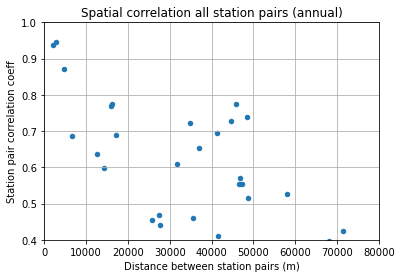

In [36]:
# basic plot
corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='tab:blue',
                               title="Spatial correlation all station pairs (annual)")
plt.grid()
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 80000)
plt.ylim(0.4, 1.0)
# plt.show
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorr_annual.png')

### Now add a line of best fit - try np.polyfit

### Focus on separation distances of up to 20,000 m

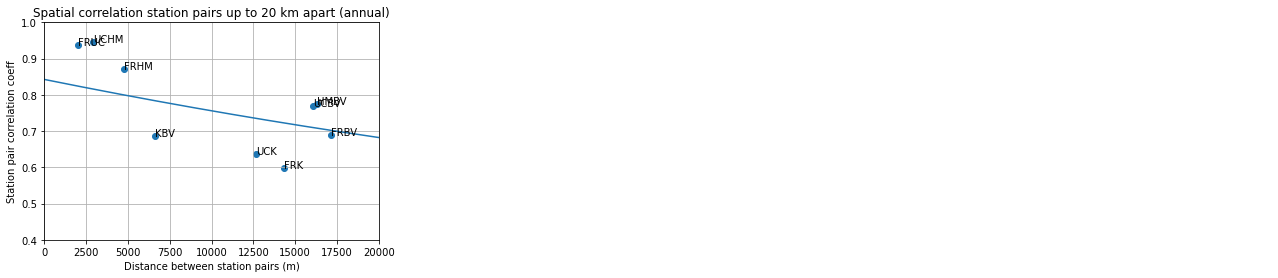

           2
6.419e-11 x - 9.307e-06 x + 0.8426


In [47]:
x = corr_df.separation_distance_m
y = corr_df.corr_coeff
# polynomial fit with degree = 2
model = np.poly1d(np.polyfit(x, y, 2))
# add fitted polynomial line to scatterplot
polyline = np.linspace(1, 80000, 1000)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.grid()
plt.title("Spatial correlation station pairs up to 20 km apart (annual)")
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 20000)
plt.ylim(0.4, 1.0)
# plot labels on points
for i, txt in enumerate(corr_df.station_pair):
    plt.annotate(txt, (corr_df.separation_distance_m.iat[i], corr_df.corr_coeff.iat[i]))
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorrfit20km_annual.png')
# show the equation of the fitted line
print(model)

### Focus on separation distances of up to 30,000 m

In [42]:
# x = corr_df.separation_distance_m
# y = corr_df.corr_coeff
# # polynomial fit with degree = 2
# model = np.poly1d(np.polyfit(x, y, 2))
# # add fitted polynomial line to scatterplot
# polyline = np.linspace(1, 80000, 1000)
# plt.scatter(x, y)
# plt.plot(polyline, model(polyline))
# plt.grid()
# plt.title("Spatial correlation station pairs up to 30 km apart (annual)")
# plt.xlabel("Distance between station pairs (m)")
# plt.ylabel("Station pair correlation coeff")
# plt.xlim(0, 30000)
# plt.ylim(0.4, 1.0)
# # plot labels on points
# for i, txt in enumerate(corr_df.station_pair):
#     plt.annotate(txt, (corr_df.separation_distance_m.iat[i], corr_df.corr_coeff.iat[i]))
# # plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorrfit30km_annual.png')

### Focus on separation distances of up to 40,000 m

In [43]:
# x = corr_df.separation_distance_m
# y = corr_df.corr_coeff
# # polynomial fit with degree = 2
# model = np.poly1d(np.polyfit(x, y, 2))
# # add fitted polynomial line to scatterplot
# polyline = np.linspace(1, 80000, 1000)
# plt.scatter(x, y)
# plt.plot(polyline, model(polyline))
# plt.grid()
# plt.title("Spatial correlation station pairs up to 40 km apart (annual)")
# plt.xlabel("Distance between station pairs (m)")
# plt.ylabel("Station pair correlation coeff")
# plt.xlim(0, 40000)
# plt.ylim(0.4, 1.0)
# # plot labels on points
# for i, txt in enumerate(corr_df.station_pair):
#     plt.annotate(txt, (corr_df.separation_distance_m.iat[i], corr_df.corr_coeff.iat[i]))
# # plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorrfit40km_annual.png')

In [40]:
# corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='tab:blue',
#                                title="Spatial correlation all station pairs (annual)")

# polynomial regression for line of best fit
# convert df columns to np arrays

# x1 = np.array(corr_df['separation_distance_m'])
# y1 = np.array(corr_df['corr_coeff'])


# x = [corr_df.separation_distance_m]
# y = [corr_df.corr_coeff]

# x = [corr_df[0]]
# y = [corr_df[1]]


# bestfitmodel = np.poly1d(np.polyfit(x, y, 3))
# bestfitline = np.linspace(1, 80000, 10000)

# corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='tab:blue',
#                                title="Spatial correlation all station pairs (annual)")


# plt.grid()
# plt.xlabel("Distance between station pairs (m)")
# plt.ylabel("Station pair correlation coeff")
# plt.xlim(0, 80000)
# plt.ylim(0.3, 1.0)
# plt.show
# # plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorr_annual.png')

### Focus on separation distances of up to 20,000 m

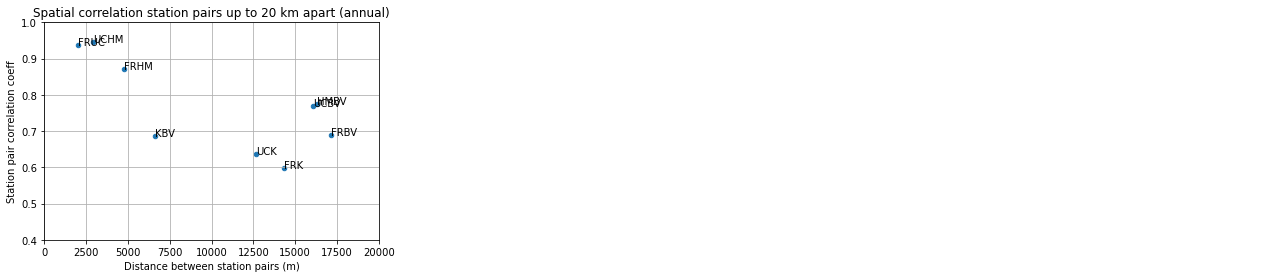

In [42]:
# basic plot
corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='tab:blue',
                               title="Spatial correlation station pairs up to 20 km apart (annual)")
plt.grid()
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 20000)
plt.ylim(0.4, 1.0)
# plot labels on points
for i, txt in enumerate(corr_df.station_pair):
    plt.annotate(txt, (corr_df.separation_distance_m.iat[i], corr_df.corr_coeff.iat[i]))
# plt.show
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorr20km_annual.png')

### Focus on separation distances of up to 30,000 m

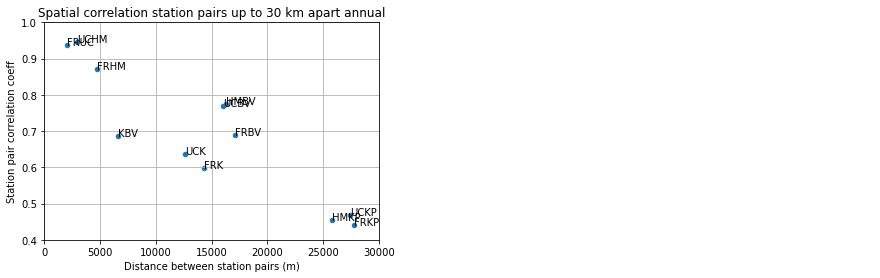

In [43]:
# basic plot
corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='tab:blue',
                               title="Spatial correlation station pairs up to 30 km apart annual")
plt.grid()
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 30000)
plt.ylim(0.4, 1.0)
for i, txt in enumerate(corr_df.station_pair):
    plt.annotate(txt, (corr_df.separation_distance_m.iat[i], corr_df.corr_coeff.iat[i]))
# plt.show
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorr30km_annual.png')

### Focus on separation distances of up to 40,000 m

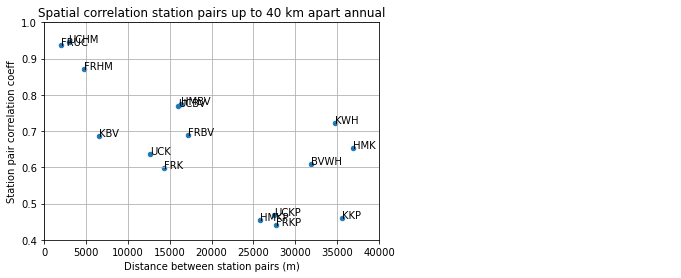

In [44]:
# basic plot
corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='tab:blue',
                               title="Spatial correlation station pairs up to 40 km apart annual")
plt.grid()
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 40000)
plt.ylim(0.4, 1.0)
for i, txt in enumerate(corr_df.station_pair):
    plt.annotate(txt, (corr_df.separation_distance_m.iat[i], corr_df.corr_coeff.iat[i]))
# plt.show
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorr40km_annual.png')

### Focus on separation distances of up to 50,000 m

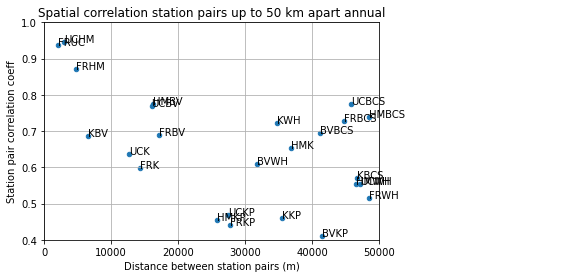

In [45]:
# basic plot
corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='tab:blue',
                               title="Spatial correlation station pairs up to 50 km apart annual")
plt.grid()
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 50000)
plt.ylim(0.4, 1.0)
for i, txt in enumerate(corr_df.station_pair):
    plt.annotate(txt, (corr_df.separation_distance_m.iat[i], corr_df.corr_coeff.iat[i]))
# plt.show
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorr50km_annual.png')

### Try to produce plots with labelled points

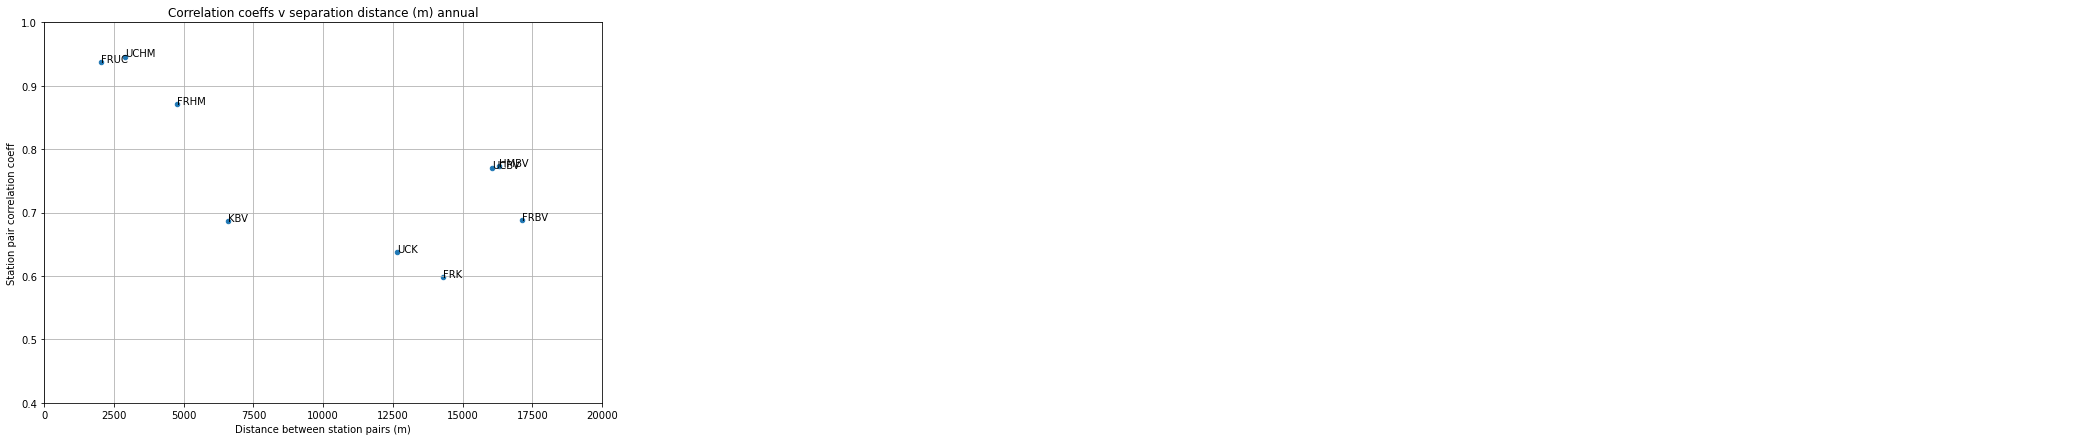

In [85]:
# SAME PLOT BUT WITH LABELLED POINTS
# ax = corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='tab:blue',
#                                title="Correlation coeffs v separation distance (m) annual")
# # plot labels on points
# for i, txt in enumerate(corr_df.station_pair):
#     ax.annotate(txt, (corr_df.separation_distance_m.iat[i], corr_df.corr_coeff.iat[i]))
# plt.grid()
# plt.xlabel("Distance between station pairs (m)")
# plt.ylabel("Station pair correlation coeff")
# plt.xlim(0, 20000)
# plt.ylim(0.4, 1.0)
# # plt.show
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorr20km_annual.png')

<function matplotlib.pyplot.show(close=None, block=None)>

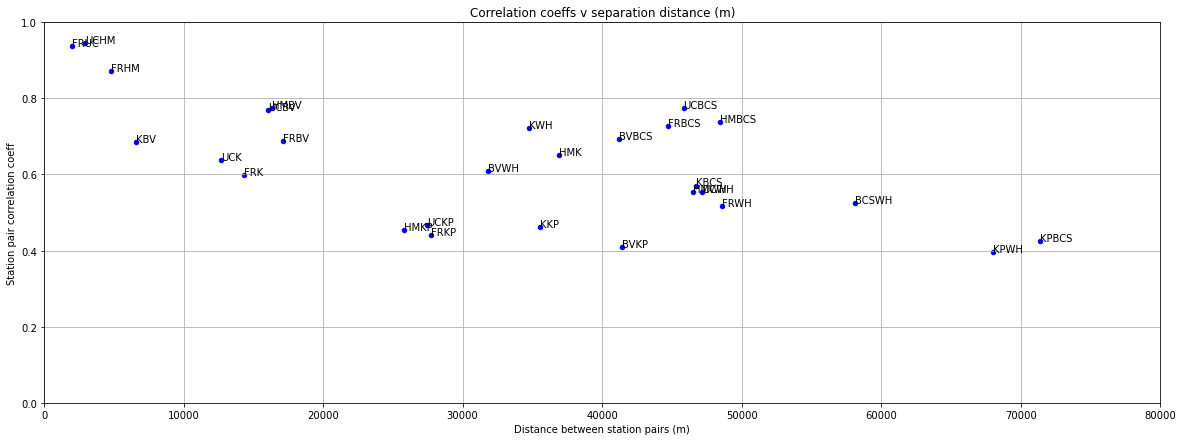

<Figure size 1440x504 with 0 Axes>

In [64]:
# method 1
ax = corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='b',
                               title="Correlation coeffs v separation distance (m)")
# plot labels on points
for i, txt in enumerate(corr_df.station_pair):
    ax.annotate(txt, (corr_df.separation_distance_m.iat[i], corr_df.corr_coeff.iat[i]))
plt.grid()
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 80000)
plt.ylim(0, 1.0)

plt.figure(figsize = (20, 7))

plt.show
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorr_daily2005-16.png')

<function matplotlib.pyplot.show(close=None, block=None)>

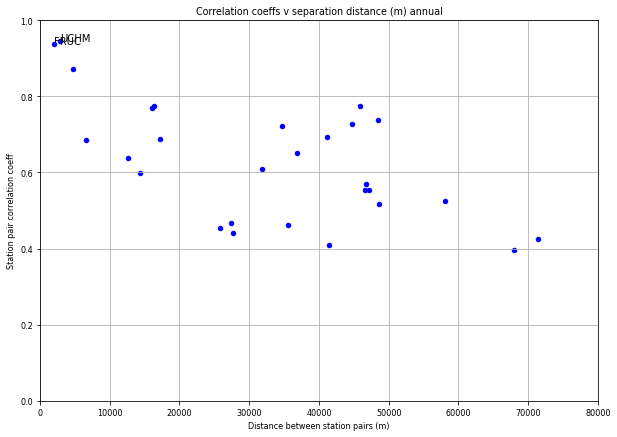

In [76]:
# try another method of labelling points

corr_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='b',
                               title="Correlation coeffs v separation distance (m) annual")
# set figsize
plt.rcParams["figure.figsize"] = (10,7)
# set label sizes
plt.rc('font', size=10)

# plot labels on points
plt.annotate("FRUC", (corr_df.separation_distance_m[0], corr_df.corr_coeff[0]))
plt.annotate("UCHM", (corr_df.separation_distance_m[7], corr_df.corr_coeff[7]))


plt.grid()
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 80000)
plt.ylim(0, 1.0)

# plt.figure(figsize = (15, 7))

plt.show
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorr_daily2005-16.png')